In [ ]:
# Import necessary libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset from the raw data folder
df = pd.read_csv("../data/raw/data.csv") 
# Display the first 5 rows of the dataset to preview its structure
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
# Print the number of rows and columns in the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Show data types of each column and check for null values
df.info()

# Count missing (null) values in each column
# This helps us see if we need to clean or impute any columns
df.isnull().sum()

Rows: 95662
Columns: 16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [ ]:
# Convert the 'TransactionStartTime' column from string to datetime format with UTC
# This is important for any time-based feature engineering
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True)

In [ ]:
# Display basic statistics for all numeric columns (mean, std, min, max, percentiles)
# Helps identify data spread and detect outliers
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


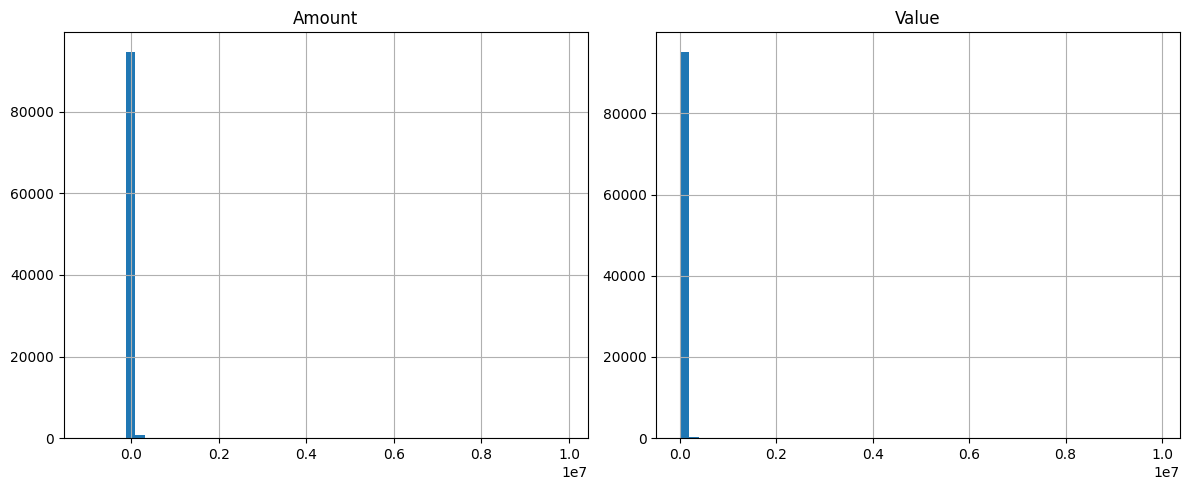

Amount    3363.127739
Value     3378.069274
dtype: float64

In [ ]:
# Plot histograms for 'Amount' and 'Value' to visualize their distribution
# This helps us see skewness and how values are spread
df[['Amount', 'Value']].hist(bins=50, figsize=(12, 5))
plt.tight_layout()
plt.show()

# Calculate skewness of 'Amount' and 'Value'
# High skewness means the distribution is lopsided — many small values and few very large ones
df[['Amount', 'Value']].skew()
# Calculate kurtosis — high kurtosis means there are extreme outliers in the data
df[['Amount', 'Value']].kurt()

In [ ]:
# Define numerical features for deeper analysis
numerical_features = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']
# Define categorical features (non-numeric but useful for analysis)
categorical_features = ['CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId']

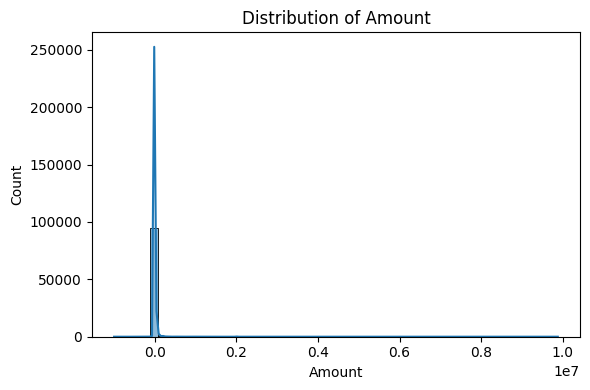

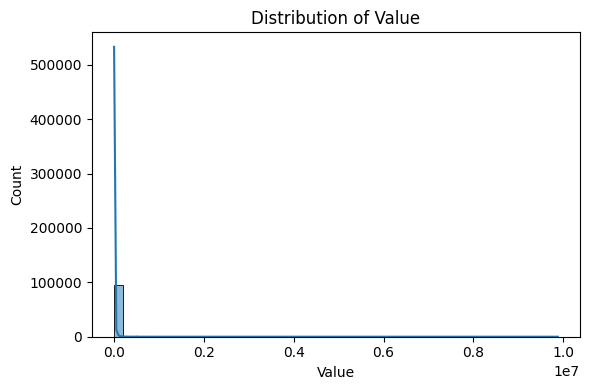

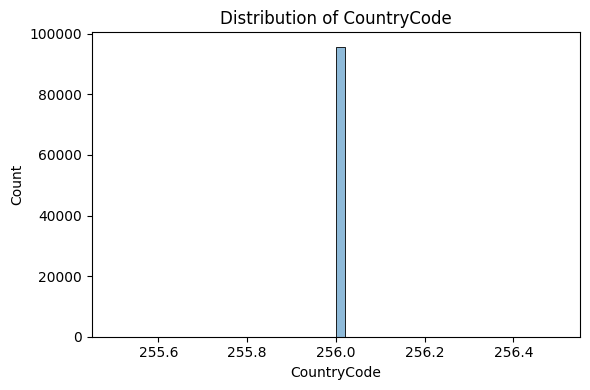

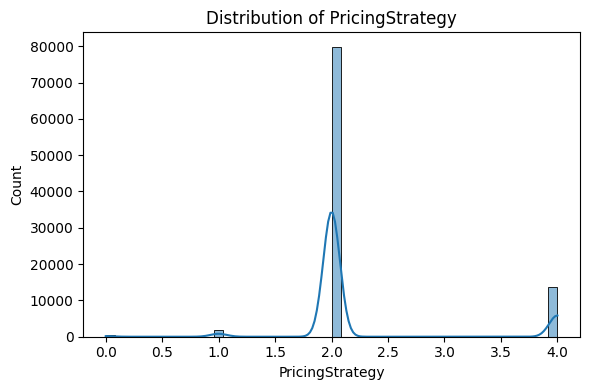

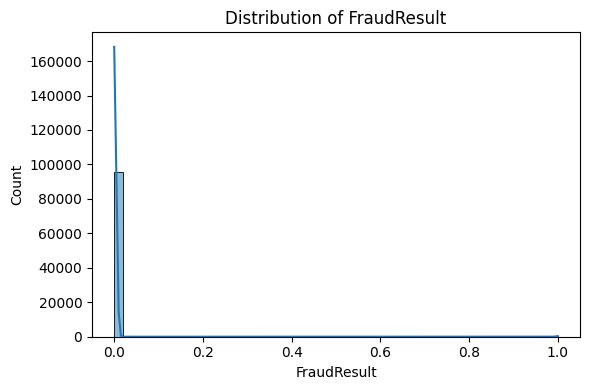

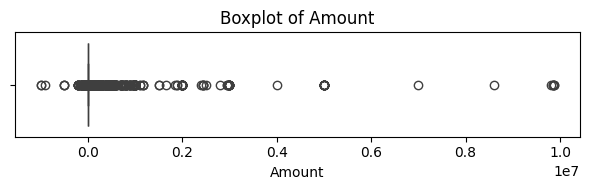

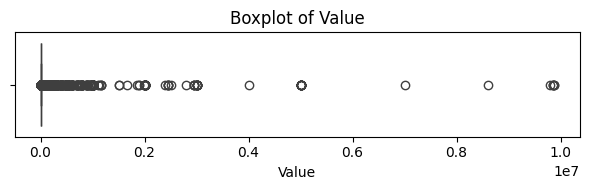

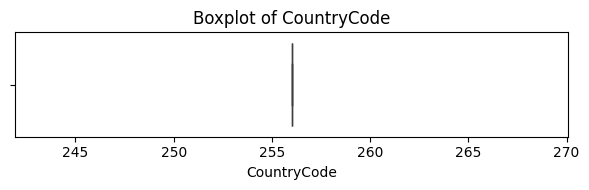

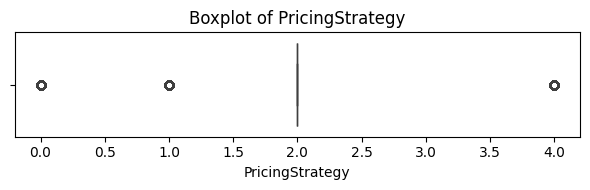

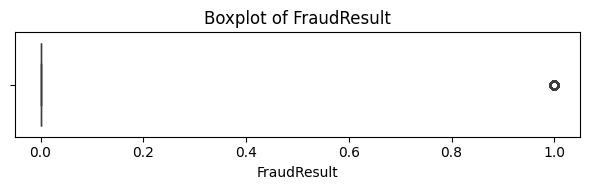

In [ ]:
# Plot histograms for each numerical feature to understand their distribution
# These help detect skewness, modality, and concentration of values
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot boxplots for numerical features to visually detect outliers
# Outliers appear as points far from the "box" (central data)
for col in numerical_features:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

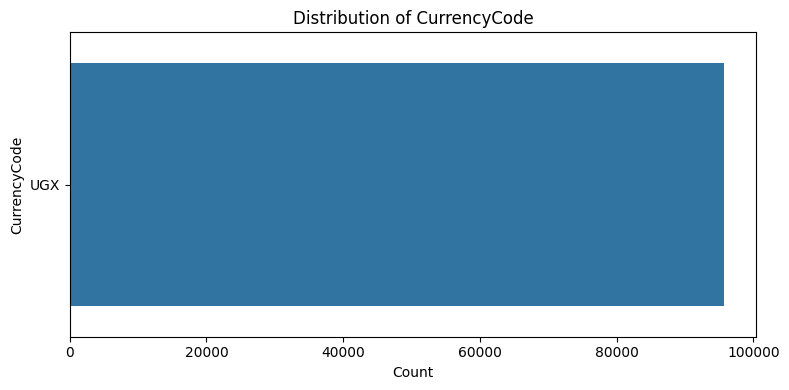

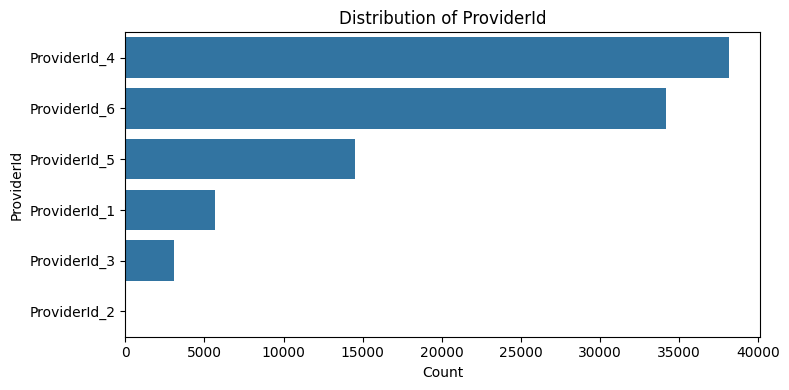

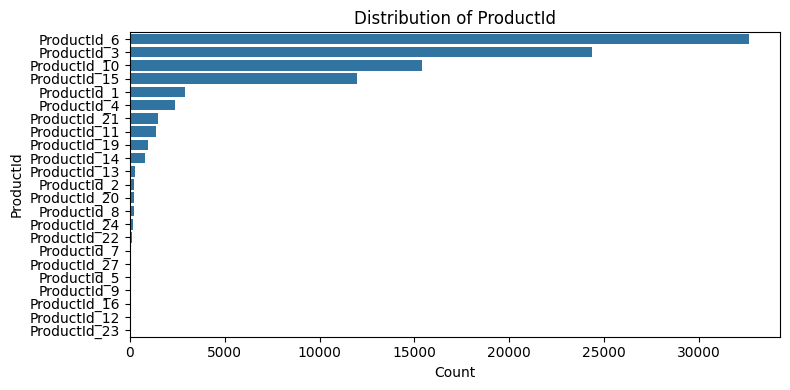

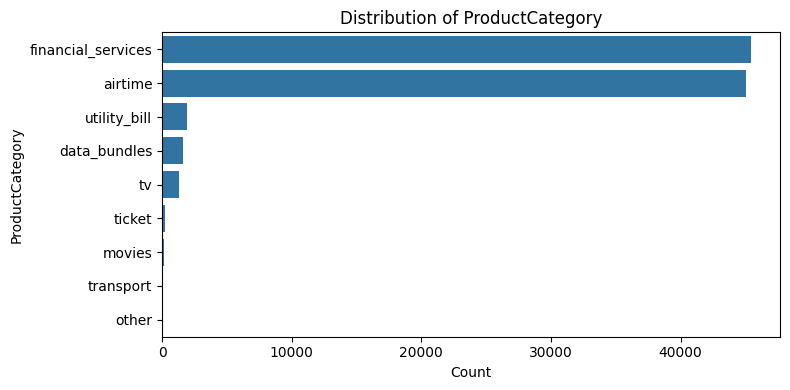

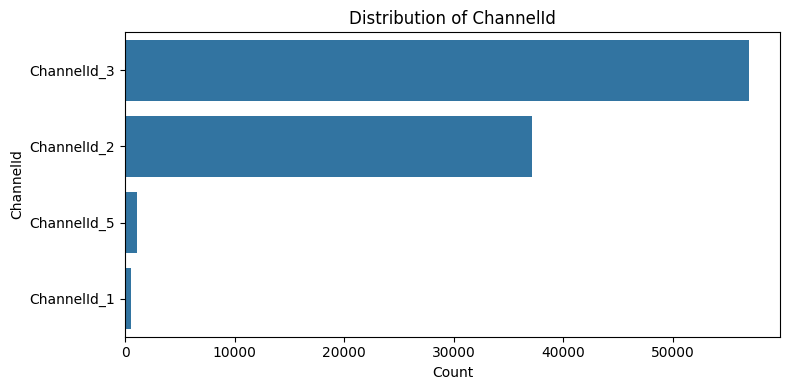

In [ ]:
# Plot count plots for each categorical feature
# This shows the frequency of each category (e.g., which product category is used most)
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

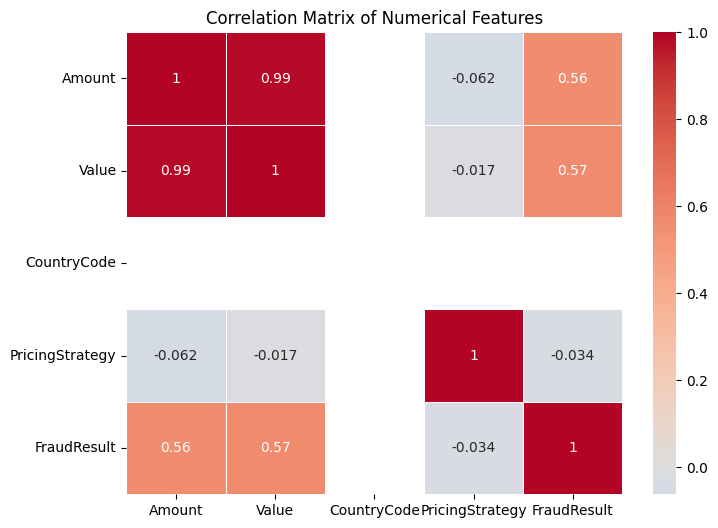

In [ ]:
# Compute correlation between numerical features
# This helps us understand how features relate to each other numerically
correlation_matrix = df[numerical_features].corr()

# Visualize the correlation matrix as a heatmap
# Values near 1 or -1 indicate strong relationships; 0 means no correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

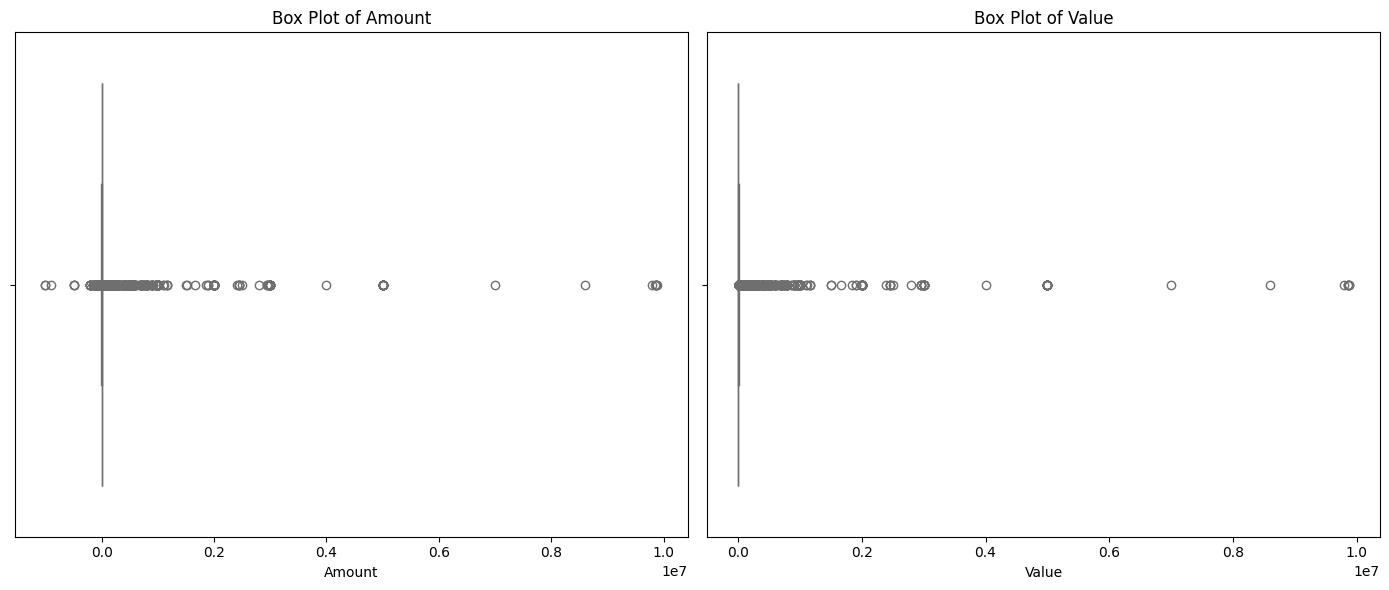

In [ ]:
# Define key numeric columns for focused outlier detection
numerical_columns = ['Amount', 'Value']

# Use box plots again to compare outlier shapes of 'Amount' and 'Value' side by side
plt.figure(figsize=(14, 6))

for i, col in enumerate(numerical_columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### 🔍 Key EDA Insights

1. **Clean and complete data**: The dataset contains 95,662 rows and 16 columns, with no missing values. This allows us to proceed without needing imputation or row removal.

2. **Right-skewed numeric features**: Both `Amount` and `Value` are heavily right-skewed with extreme outliers (some transactions close to 10 million), while most values are close to zero. This suggests the need for log transformation or binning during feature engineering.

3. **Fraud is extremely rare**: The `FraudResult` column is highly imbalanced, with very few cases marked as fraud (roughly 0.2%). This will impact model training and require techniques like resampling or anomaly detection.

4. **Categorical concentration**: Features like `ProductCategory` and `ChannelId` are dominated by a few categories (e.g., airtime, financial_services, utility_bill, and Android-based channels), which may carry strong signals for predicting risk.

5. **No strong linear correlations**: The correlation matrix shows no strong relationships between the numeric features (`Amount`, `Value`, `CountryCode`, etc.), suggesting multicollinearity is not a concern, but more complex relationships may exist.

